## Phase-space decomposition via a machine-learned cubical complex 

First we import the functions that will be used.

In [1]:
from src.attractor_id.jupyter_functions import train_classifier, compute_homology, make_decomposition_plot, make_polytope_plot, accuracy, plot_loss

### Code parameters

These are the parameters that can be changed before running the computation. The parameters set here override any parameters that are set in the configuration files.

The following systems are implemented:
- 'straight_separatrix'
- 'radial_2labels'
- 'radial_3labels'
- 'curved_separatrix'
- 'EMT'
- 'periodic'
- 'ellipsoidal_kd' for k = 2, 3, 4, 5, 6
- 'DSGRN_2d_network'
- 'iris'
- 'leslie'
- 'periodic_3labels'

In [2]:
system = 'straight_separatrix'

N = 10 # number of nodes in the hidden layer of the network (must be an integer multiple of the dimension of the system)

labeling_threshold = 0.3 # threshold in (0, 1/2) used to label cubes

epochs = 20 # number of times that the data is cycled through during neural network training

config_file = f'config/{system}.txt'

### Train neural network

We obtained a trained model, which is a cubical neural network with a hidden layer of width ```N```.

In [3]:
model_filename = 'model'
model, train_loss_list, test_loss_list = train_classifier(system, N, epochs, model_filename, config_file)
accuracy = accuracy(system, model, labeling_threshold, config_file)

Epoch 1/20
Test loss: 0.020120
Train loss: 0.020780
Epoch 2/20
Test loss: 0.013992
Train loss: 0.010352
Epoch 3/20
Test loss: 0.011619
Train loss: 0.013456
Epoch 4/20
Test loss: 0.010221
Train loss: 0.004924
Epoch 5/20
Test loss: 0.008078
Train loss: 0.014278
Epoch 6/20
Test loss: 0.007172
Train loss: 0.010524
Epoch 7/20
Test loss: 0.006218
Train loss: 0.009821
Epoch 8/20
Test loss: 0.006396
Train loss: 0.008518
Epoch 9/20
Test loss: 0.005288
Train loss: 0.002058
Epoch 10/20
Test loss: 0.005621
Train loss: 0.006818
Epoch 11/20
Test loss: 0.003964
Train loss: 0.000532
Epoch 12/20
Test loss: 0.003611
Train loss: 0.007948
Epoch 13/20
Test loss: 0.003769
Train loss: 0.000468
Epoch 14/20
Test loss: 0.003130
Train loss: 0.000276
Epoch 15/20
Test loss: 0.003081
Train loss: 0.000151
Epoch 16/20
Test loss: 0.003914
Train loss: 0.006323
Accuracy using labeling threshold on test dataset:  0.9855


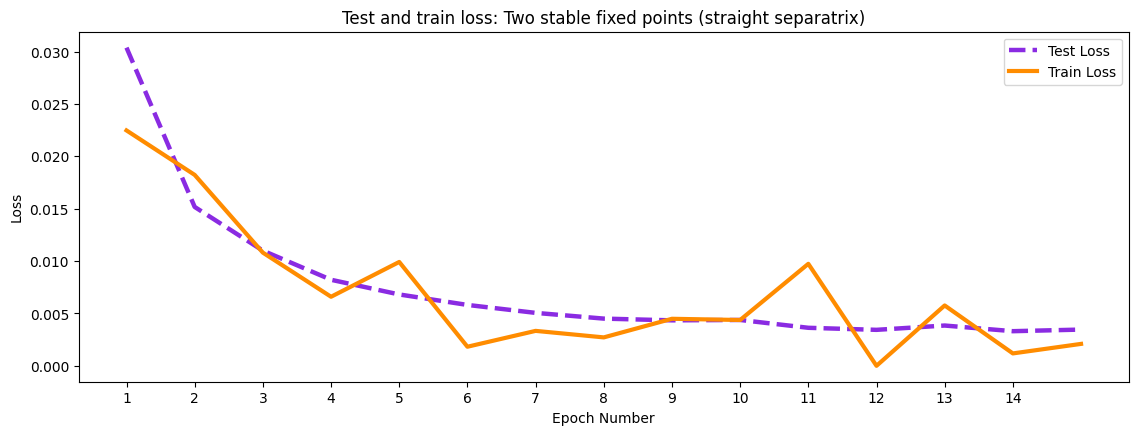

<Figure size 640x480 with 0 Axes>

In [4]:
file_name = 'loss'
plot_loss(system, test_loss_list, train_loss_list, file_name, config_file)

### Compute homology of labeled regions of the MLCD obtained from the neural network

We compute the homology of each of the labeled regions according to the decomposition determined by the trained model. The output is the Betti numbers.

If the region is empty, this is specified.

We also compute the number of labeled cubes.

In [5]:
labeling_threshold = 0.3
hyperplane_list, cube_list = compute_homology(system, labeling_threshold, N, model, config_file)

df_train_url: https://raw.githubusercontent.com/begelb/attractor-id-data/refs/heads/main/linear_separatrix/train.csv?token=GHSAT0AAAAAADA5DODR4KGVK6XKT6E7XDT22AD7UAA
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/brittany/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 3548, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/1k/xjqyqh5j4lb7wbs_9012tmbm0000gn/T/ipykernel_20786/2360679765.py", line 2, in <module>
    hyperplane_list, cube_list = compute_homology(system, labeling_threshold, N, model)
  File "/Users/brittany/Documents/GitHub/attractor_identification_draft/src/attractor_id/jupyter_functions.py", line 44, in compute_homology
    sorted_hyperplane_dict, list_of_hyperplane_lists, total_hyperplane_list = get_decomposition_data(config, N, train_data, model)
  File "/Users/brittany/Documents/GitHub/attractor_identification_draft/src/attractor_id/decomposition.py", line 149, in get_decomposition_data
    data_as_tensors = convert_data_to_tensors(data, config.dimension)
  File "/Users/brittany/Documents/GitHub/attractor_identification_draft/src/attractor_id/data.py", lin

### Plot MLCD

The MLCD overlays points of phase space colored according to the value of the network.

In [6]:
file_name = 'decomposition_plot'
make_decomposition_plot(system, hyperplane_list, model, file_name, config_file)

NameError: name 'hyperplane_list' is not defined

### Plot labeled cubes

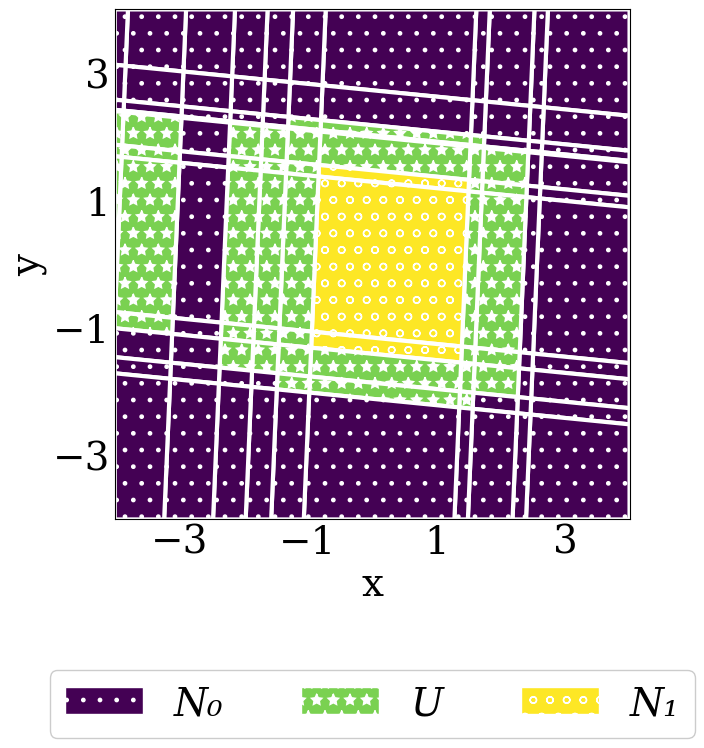

In [ ]:
file_name = 'polytope_plot'
make_polytope_plot(system, cube_list, file_name, config_file)

### Changing further code parameters

Further parameters such as learning rate can be changed for each system in the configuration files in the folder ```config```. 

The following sentence if false at the moment. This computation used the data available at https://github.com/begelb/attractor-id-data. To use a local copy of data, change the parameter ```using_local_data``` to ```True``` and change the paths following ```train_data_file``` and ```test_data_file``` in the configuration file to the appropriate paths.